### Atividade da Aula

- **Aluno:** Augusto Mathias Adams

#### Parte 1

**Rode todo o código. Responda às questões nele contidas e complete-o, se necessário**

Feito.

#### Parte 2

**Adicione amostras tanto ao problema de regressão quanto ao problema de classificação (sem comprometer de forma significativa a capacidade do modelo de explicar estes dados)**

Conforme a tradição, introduzi ruído e uma quantidade razoável de amostras novas. Tudo documentado na seção **Happy Hour** deste *notebook*.

1. Desempenho da Regressao linear

 - $R^2$:  1.00
 - $MAE$: 1.60
 - $MSE$: 4.07
 - $RMSE$: 2.02
 - $MAPE$: 0.52

2. Desempenho da Regressão Logística

| Algoritmo         | Classe   |   $T_P$ |   $F_P$ |   $F_N$ |   $P(\%)$ |   $R(\%)$ |   $F_1$ Score |
|:------------------|:---------|--------:|--------:|--------:|----------:|----------:|--------------:|
| Logit(TensorFlow) | $Y_0$    |    2212 |      37 |      39 |      98.4 |      98.3 |             1 |
| Logit(TensorFlow) | $Y_1$    |    2712 |      39 |      37 |      98.6 |      98.7 |             1 |
| Logit(Numpy)      | $Y_0$    |    2212 |      37 |      39 |      98.4 |      98.3 |             1 |
| Logit(Numpy)      | $Y_1$    |    2712 |      39 |      37 |      98.6 |      98.7 |             1 |

# Neurônios e camadas

Neste código nós iremos explorar o funcionamento interno dos neurônios (que são as unidades elementares das redes neurais) e das camadas.

Especificamente, este código fará paralelos com modelos que você já aprendeu em aulas anteriores: o modelo de regressão linear e o modelo de regressão logística.

O código faz isso por meio da ferramenta denominada TensorFlow, que consiste num ambiente bastante utilizado hoje no contexto de Aprendizado de Máquina.

## Pacotes

**Tensorflow e Keras**  
Tensorflow é um pacote de machine learning desenvolvido pela Google. Em 2019, a Google integrou Keras ao Tensorflow e lançou o Tensorflow 2.0. Keras é um ambiente desenvolvido independentemente por François Chollet.

Caso você esteja utilizando Google Colab, provavelmente o TensorFlow já encontra-se instalado no servidor que rodará o seu código. Portanto, os comandos abaixo serão reconhecidos automaticamente.

Por outro lado, caso você esteja utilizando o localhost do Jupyter, talvez você terá que instalar o TensorFlow no seu Ambiente Anaconda. Para fazer isso:
- Veja o seguinte tutorial https://docs.anaconda.com/anaconda/user-guide/tasks/tensorflow/
- Caso não tenha funcionado para você a opção acima, pesquise no google algum outro tutorial usando os seguintes termos de busca: ``how to install tensorflow in anaconda''
- Depois de instalar, feche e abra o Jupyter novamente
- Caso não tenha funcionado para você a opção acima, tente instalar o tensorflow usando um outro ambiente de programação em Python. Por exemplo, abra o Spyder e rode o seguinte comando: pip install tensorflow
- Caso nada disso funcione em seu computador, considere utilizar o Google Colab

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.activations import sigmoid
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

## Neurônio sem ativação - Modelo de Regressão Linear


### Conjunto de dados

Nesse contexto de regressão linear, usaremos o exemplo abaixo.

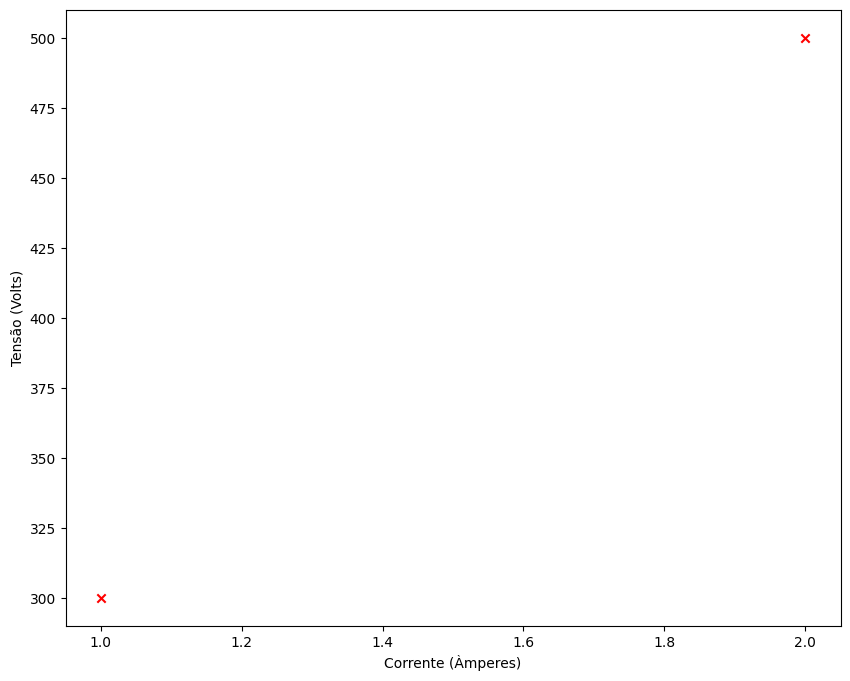

In [107]:
X_train = np.array([[1.0], [2.0]], dtype=np.float32)
Y_train = np.array([[300.0], [500.0]], dtype=np.float32)

fig, ax = plt.subplots(1,1, figsize=(10,8))
ax.scatter(X_train, Y_train, marker='x', c='r', label="Amostras")
ax.set_ylabel('Tensão (Volts)')
ax.set_xlabel('Corrente (Àmperes)')
plt.show()

### Modelo de Regressão Linear

Dizemos que um neurônio não possui ativação quando ele implementa uma regressão linear simples do tipo:
$$ f_{\mathbf{w},b}(x^{(i)}) = \mathbf{w}\cdot x^{(i)} + b \tag{1}$$



Podemos definir uma camada com um único neurônio (uma única unidade) e comparar seu funcionamento com aquele apresentado pela função de regressão linear que já aprendemos.

In [108]:
camada_linear = tf.keras.layers.Dense(units=1, activation = 'linear', ) # Dense é o tipo de camada de rede neural que nós aprendemos até agora

Vamos examinar os pesos presentes nessa camada:

In [109]:
camada_linear.get_weights()

[]

Não há pesos nessa camada uma vez que eles ainda não foram inicializados (instanciados). Vamos calcular a saída do modelo (chamada aqui de `a1`) para um exemplo presente em `X_train`. Isso fará com que os pesos sejam inicializados com valores aleatórios pequenos automaticamente. Note que a entrada para a camada precisa ser 2-D (por isso estamos fazendo o reshape).

In [110]:
print(X_train[0])

a1 = camada_linear(X_train[0].reshape(1,1))
print(a1)

[1.]
tf.Tensor([[-0.07839417]], shape=(1, 1), dtype=float32)


O resultado é um tensor (apenas um outro nome para `array`) com shape (1,1). Ou seja, note que a entrada `X_train[0]=1` entrou na nossa camada e gerou uma saída `a1`.
Conforme já mencionado, os pesos do modelo são inicializados automaticamente como valores aleatórios pequenos. O valor padrão para a inicialização dos termos independentes do tipo $b$ é zero.

In [111]:
w,b = camada_linear.get_weights()
print(f"w = {w}, b={b}")

w = [[-0.07839417]], b=[0.]


Observe que um modelo de regressão linear com uma única característica de entrada produz um único peso $w$ e um único valor independente $b$.

Vamos agora alterar os valores dos pesos (que foram inializados automaticamente) para alguns valores conhecidos:

In [112]:
set_w = np.array([[200]])
set_b = np.array([100])

# a função set_weights recebe na sua entrada uma lista de arrays numpy
camada_linear.set_weights([set_w, set_b])
print(camada_linear.get_weights())

[array([[200.]], dtype=float32), array([100.], dtype=float32)]


Vamos comparar agora a equação (1) com a saída da nossa camada.

In [113]:
a1 = camada_linear(X_train[0].reshape(1,1))
print(a1)
alin = np.dot(set_w,X_train[0].reshape(1,1)) + set_b
print(alin)

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[[300.]]


Elas produzem os mesmos valores! Isso mostra que estamos de fato implementado o modelo de regressão linear desejado.

Vamos agora usar nossa camada linear para fazer previsões com base nos nossos dados de treinamento.

In [114]:
previsao_tensorflow = camada_linear(X_train)
previsao_numpy      = np.dot( X_train, set_w) + set_b

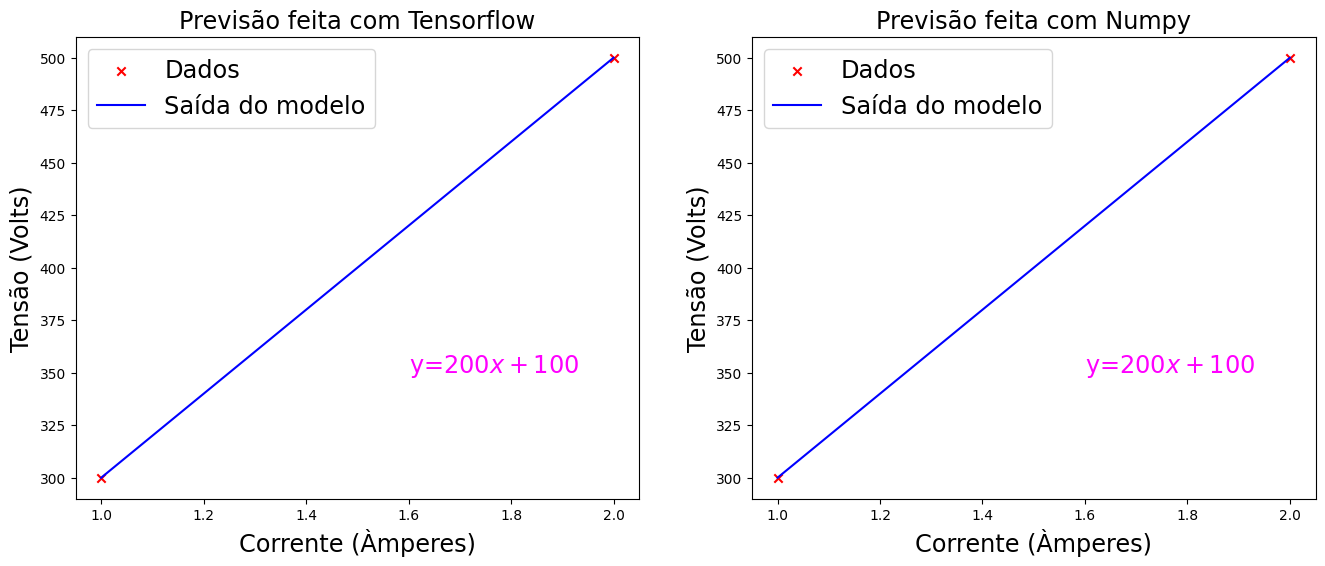

In [115]:
fig, ax = plt.subplots(1,2, figsize=(16, 6))
ax[0].scatter(X_train, Y_train, marker='x', c='r', label="Dados")
ax[0].plot(X_train, previsao_tensorflow,  c='blue', label="Saída do modelo")
ax[0].text(1.6,350,r"y=$200 x + 100$", fontsize='xx-large', color='magenta')
ax[0].legend(fontsize='xx-large')
ax[0].set_ylabel('Tensão (Volts)', fontsize='xx-large')
ax[0].set_xlabel('Corrente (Àmperes)', fontsize='xx-large')
ax[0].set_title("Previsão feita com Tensorflow",fontsize='xx-large')

ax[1].scatter(X_train, Y_train, marker='x', c='r', label="Dados")
ax[1].plot(X_train, previsao_numpy,  c='blue', label="Saída do modelo")
ax[1].text(1.6,350,r"y=$200 x + 100$", fontsize='xx-large', color='magenta')
ax[1].legend(fontsize='xx-large')
ax[1].set_ylabel('Tensão (Volts)', fontsize='xx-large')
ax[1].set_xlabel('Corrente (Àmperes)', fontsize='xx-large')
ax[1].set_title("Previsão feita com Numpy",fontsize='xx-large')
plt.show()

## Neurônio com ativação sigmoide - Modelo de Regressão Logística

A função implementada por um/a neurônio/unidade com ativação sigmoide consiste no nosso modelo de regressão logística já aprendido:
$$ f_{\mathbf{w},b}(x^{(i)}) = g(\mathbf{w}x^{(i)} + b) \tag{2}$$
onde $$g(x) = sigmoid(x)$$

Vamos definir $w$ e $b$ para valores conhecidos para checar o modelo.


### Conjunto de dados

In [116]:
X_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1,1)  # Matriz 2-D
Y_train = np.array([0,  0, 0, 1, 1, 1], dtype=np.float32).reshape(-1,1)  # Matriz 2-D

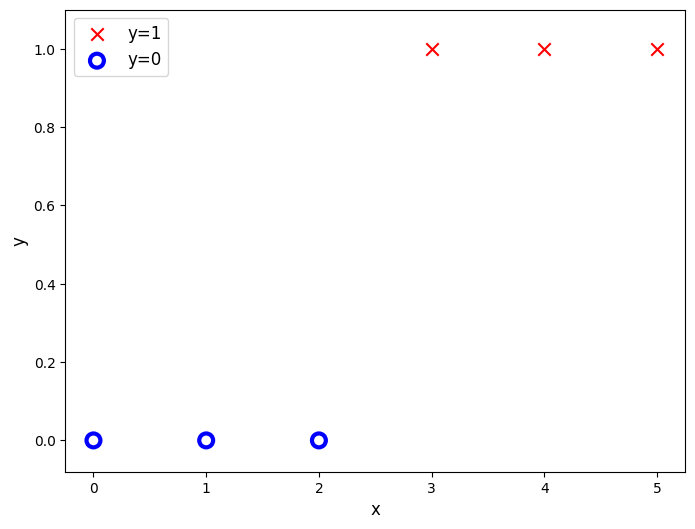

In [117]:
pos = Y_train == 1
neg = Y_train == 0

fig,ax = plt.subplots(1,1,figsize=(8,6))
ax.scatter(X_train[pos], Y_train[pos], marker='x', s=80, c = 'red', label="y=1")
ax.scatter(X_train[neg], Y_train[neg], marker='o', s=100, label="y=0", facecolors='none',
              edgecolors="blue",lw=3)

ax.set_ylim(-0.08,1.1)
ax.set_ylabel('y', fontsize=12)
ax.set_xlabel('x', fontsize=12)
ax.legend(fontsize=12)
plt.show()

### Neurônio Logístico (sigmoide)

Nós podemos implementar um 'neurônio logístico' adicionando uma ativação sigmoide. Esse neurônio então estará implemetando a equação (2) acima.

Essa seção irá criar um Modelo Tensorflow que contém nossa camada logística para demonstrar um método alternativo para criar modelos. O Tensorflow é mais frequentemente usado para criar modelos com múltiplas camadas. O modelo sequencial [Sequential](https://keras.io/guides/sequential_model/) é uma forma conveniente de construir esses modelos.

In [118]:
modelo = Sequential( # Sequencial é o comando que podemos usar para criar uma rede neural com múltiplas camadas usando apenas um comando. Nesse caso, nossa rede possui apenas uma camada
    [
        tf.keras.layers.Dense(units=1, input_dim=1,  activation = 'sigmoid', name='L1') # Dense é o tipo de camada de rede neural que nós aprendemos até agora
    ]
)

/home/augusto/development/money_carousell/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


A função `model.summary()` mostra um resumo do modelo (camadas e o número de parâmetros do modelo):
- Há apenas uma camada nesse modelo
- Essa camada possui apenas uma unidade
- Essa unidade possui dois parâmetros, $w$ e $b$.

In [119]:
modelo.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [120]:
camada_logistica = modelo.get_layer('L1')
w,b = camada_logistica.get_weights()
print(w,b)
print(w.shape,b.shape)

[[-0.00539446]] [0.]
(1, 1) (1,)


Note o parâmetro $w$ foi inicializado com um valor aleatório pequeno e $b$ foi inicializado em zero.

Vamos definir valores desejados para esses dois parâmetros

In [121]:
set_w = np.array([[2]])
set_b = np.array([-4.5])
# a função set_weights recebe na sua entrada uma lista de arrays numpy
camada_logistica.set_weights([set_w, set_b])
print(camada_logistica.get_weights())

[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


Vamos comparar a equação (2) com a saída da camada.

In [122]:
a1 = modelo.predict(X_train[0].reshape(1,1))
print(a1)
z    = np.dot(set_w,X_train[0].reshape(1,1)) + set_b;
alog = 1.0/(1.0+np.exp(-z))
print(alog)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[0.01098694]]
[[0.01098694]]


Elas produzem os mesmos valores! (aprox. 0.01)

Agora, nós podemos usar nossa camada logística e o modelo Numpy para fazer previsões com base nos dados de treinamento.

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step


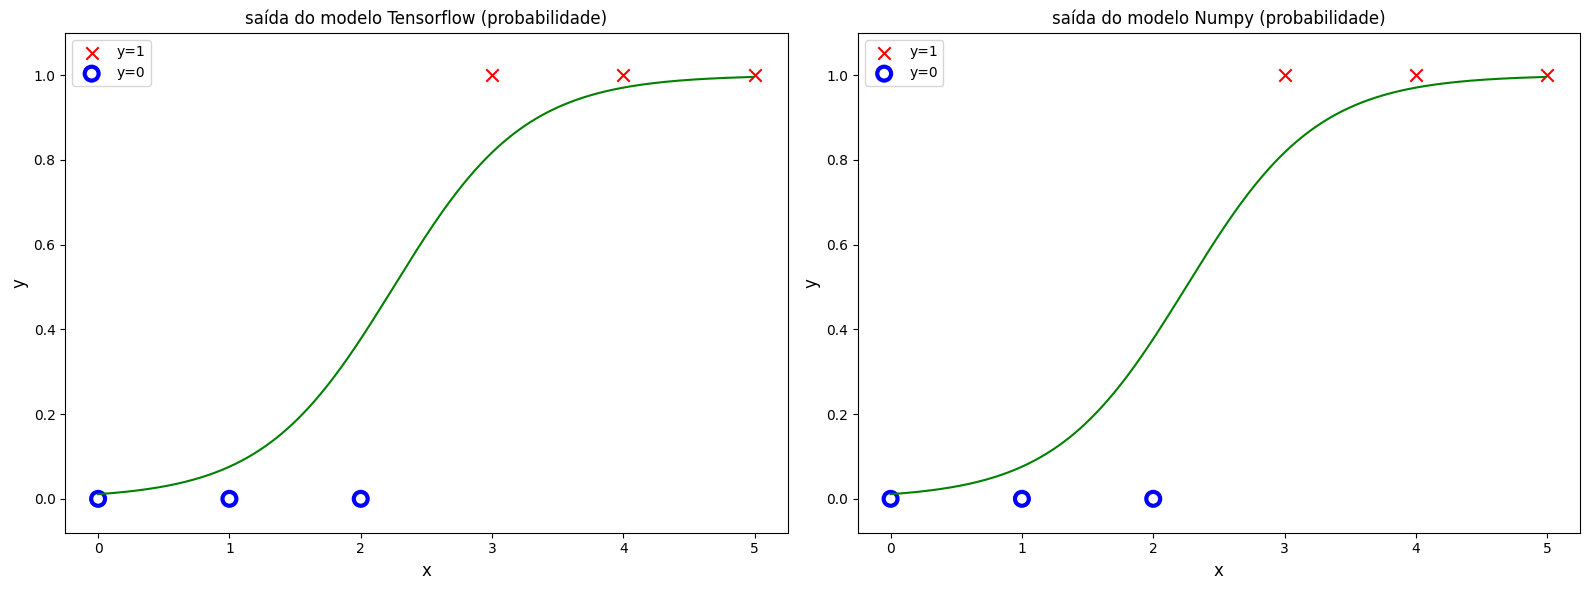

In [123]:
pos = Y_train == 1
neg = Y_train == 0

fig,ax = plt.subplots(1,2,figsize=(16,6))
ax[0].scatter(X_train[pos], Y_train[pos], marker='x', s=80, c = 'red', label="y=1")
ax[0].scatter(X_train[neg], Y_train[neg], marker='o', s=100, label="y=0", facecolors='none',
              edgecolors='b',lw=3)

# calculando a saída do modelo tensorflow
x = np.arange(0,5,0.01)
f = modelo.predict(x.reshape(-1,1))
ax[0].plot(x, f.reshape(-1,), c = 'green')

ax[0].set_ylim(-0.08,1.1)
ax[0].set_ylabel('y', fontsize=12)
ax[0].set_xlabel('x', fontsize=12)
ax[0].set_title('saída do modelo Tensorflow (probabilidade)')
ax[0].legend()



ax[1].scatter(X_train[pos], Y_train[pos], marker='x', s=80, c = 'red', label="y=1")
ax[1].scatter(X_train[neg], Y_train[neg], marker='o', s=100, label="y=0", facecolors='none',
              edgecolors='b',lw=3)

# calculando a saída do modelo numpy
x = np.arange(0,5,0.01)
z = set_w*x + set_b
f = 1.0/(1.0+np.exp(-z))
ax[1].plot(x, f.reshape(-1,), c = 'green')

ax[1].set_ylim(-0.08,1.1)
ax[1].set_ylabel('y', fontsize=12)
ax[1].set_xlabel('x', fontsize=12)
ax[1].set_title('saída do modelo Numpy (probabilidade)')
ax[1].legend()


plt.tight_layout()
plt.show()

# Parabéns!

Você construiu uma rede neural bastante simples e explorou as similaridades de um neurônio tanto no contexto da regressão linear como também no contexto da regressão lógistica.

# Happy Hour - Atividades de Aula

## Regressão Linear

Text(0.5, 1.0, 'Previsão feita com Tensorflow')

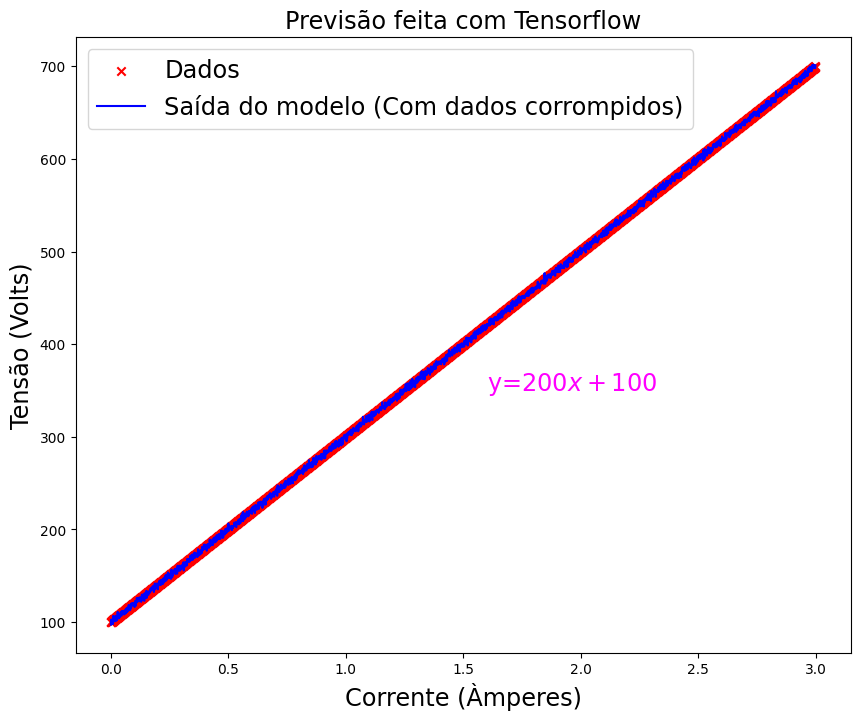

In [124]:
# amostras para regressão linear
mu = 0.0
sigma = 0.01
rng = np.random.default_rng(12345) # semente informada, para a reprodução do resultado

set_reglin_w = np.array([[200]])
set_reglin_b = np.array([100])
x_reglin = np.arange(0, 3, 0.001)
x_reglin_noise = x_reglin + rng.normal(mu, sigma, x_reglin.shape)

previsao_numpy      = x_reglin.reshape(-1, 1) * set_reglin_w + set_reglin_b
# previsão com daddos ruidosos (gostamos de caos)
previsao_tensorflow = camada_linear(x_reglin_noise.reshape(-1, 1))

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.scatter(x_reglin, previsao_numpy, marker='x', c='r', label="Dados")
ax.plot(x_reglin, previsao_tensorflow,  c='blue', label="Saída do modelo (Com dados corrompidos)")
ax.text(1.6,350,r"y=$200 x + 100$", fontsize='xx-large', color='magenta')
ax.legend(fontsize='xx-large')
ax.set_ylabel('Tensão (Volts)', fontsize='xx-large')
ax.set_xlabel('Corrente (Àmperes)', fontsize='xx-large')
ax.set_title("Previsão feita com Tensorflow",fontsize='xx-large')



### Parâmetros de avaliação


In [125]:
# poderia usar a scipy - mas sou programador raiz (mascador de abelhas)

def r_squared(y_true, y_pred):
    """
        Calcula o coeficiente de determinação R².
        Args:
            y_true (ndarray): valores verdadeiros de y
            y_pred (ndarray): valores preditos pelo modelo de y
        Returns:
            r2 (float): o valor do coeficiente de determinação
    """
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)


def mean_absolute_error(y_true, y_pred):
    """
        Calcula o erro médio absoluto (MAE)
        Args:
            y_true (ndarray): valores verdadeiros de y
            y_pred (ndarray): valores preditos pelo modelo de y
        Returns:
            mae (float): o valor do erro médio absoluto
    """
    return np.mean(np.abs(y_true - y_pred))


def mean_squared_error(y_true, y_pred):
    """
        Calcula o erro quadrático médio (MSE).
        Args:
            y_true (ndarray): valores verdadeiros de y
            y_pred (ndarray): valores preditos pelo modelo de y
        Returns:
            mse (float): o valor do erro quadrático médio

    """
    return np.mean((y_true - y_pred) ** 2)

def root_mean_squared_error(y_true, y_pred):
    """
        Calcula a raiz do erro quadrático médio (RMSE).
        Args:
            y_true (ndarray): valores verdadeiros de y
            y_pred (ndarray): valores preditos pelo modelo de y
        Returns:
            rmse (float): o valor da raiz do do erro quadrático médio
    """
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mean_absolute_percentage_error(y_true, y_pred):
    """
        Calcula o erro percentual absoluto médio (MAPE).
        Args:
            y_true (ndarray): valores verdadeiros de y
            y_pred (ndarray): valores preditos pelo modelo de y
        Returns:
            mape (float): o valor do erro percentual absoluto médio
    """
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

### Avaliação do Modelo de Regressão Linear

In [126]:
r_2 = r_squared(previsao_numpy, previsao_tensorflow)
print(f"R²: {r_2:.2f}")
mae = mean_absolute_error(previsao_numpy, previsao_tensorflow)
print(f"MAE: {mae:.2f}")
mse = mean_squared_error(previsao_numpy, previsao_tensorflow)
print(f"MSE: {mse:.2f}")
rmse = root_mean_squared_error(previsao_numpy, previsao_tensorflow)
print(f"RMSE: {rmse:.2f}")
mape = mean_absolute_percentage_error(previsao_numpy, previsao_tensorflow)
print(f"MAPE: {mape:.2f}")

R²: 1.00
MAE: 1.60
MSE: 4.07
RMSE: 2.02
MAPE: 0.52


## Regressão Logística Usando TensorFlow

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step


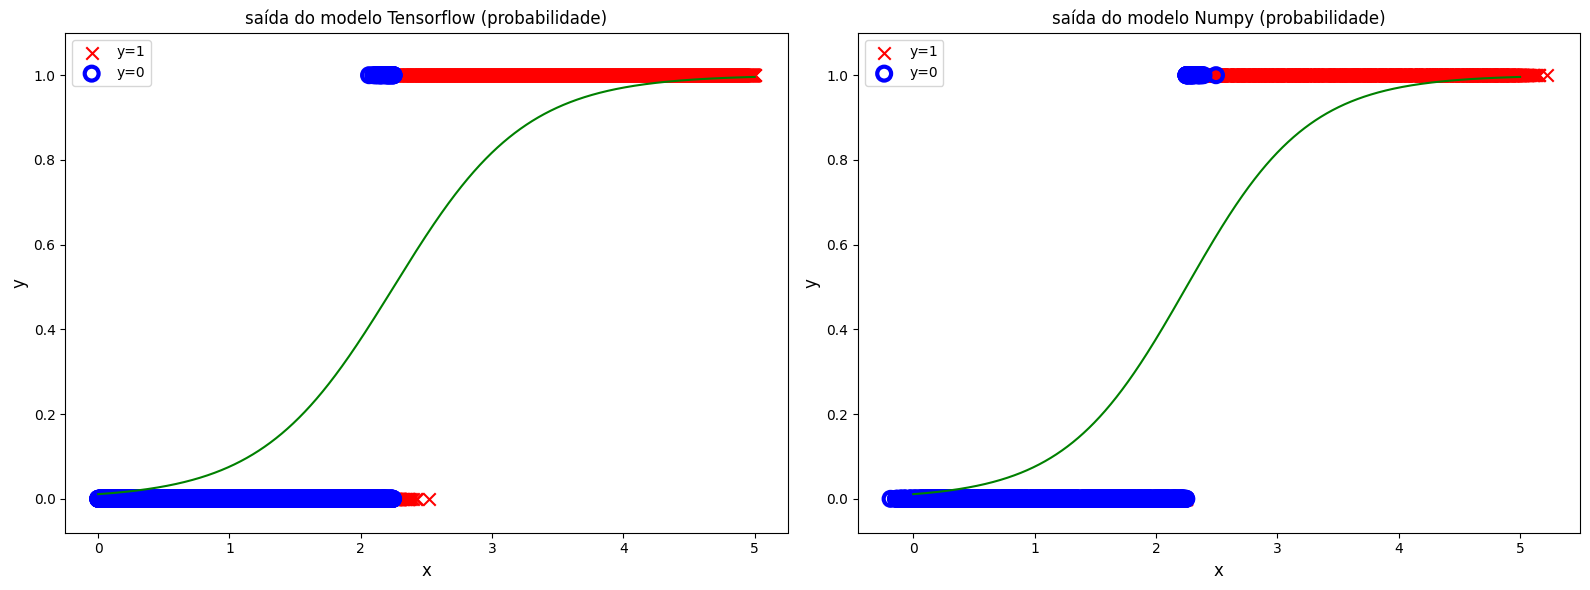

In [127]:

# amostras para a regressão logística
mu = 0.0
sigma = 0.1
rng = np.random.default_rng(12345) # semente informada, para a reprodução do resultado

set_logit_w = np.array([[2]])
set_logit_b = np.array([-4.5])
x_logit = np.arange(0, 5, 0.001)
x_logit_noise = x_logit + rng.normal(mu, sigma, x_logit.shape)

# calculando a tabela verdade
z = set_logit_w * x_logit.reshape(-1, 1) + set_logit_b
f_logit = 1.0/(1.0+np.exp(-z))
y_true = np.zeros(len(x_logit))
y_true[f_logit.flatten() > 0.5] = 1

# coletando a saída do modelo - array de entrada com dados ruidosos (gostamos de caos)
t_y_pred = modelo.predict(x_logit_noise.reshape(-1, 1)).flatten()
y_pred = np.zeros(len(x_logit))
y_pred[t_y_pred > 0.5] = 1

pos = y_true == 1
neg = y_true == 0

# coletando a saída utilizando o modelo numpy
z = set_logit_w * x_logit_noise.reshape(-1, 1) + set_logit_b
f_logit_numpy = 1.0/(1.0+np.exp(-z))
y_pred_numpy = np.zeros(len(x_logit))
y_pred_numpy[f_logit_numpy.flatten() > 0.5] = 1


fig,ax = plt.subplots(1,2,figsize=(16,6))
ax[0].scatter(x_logit[pos], y_pred[pos], marker='x', s=80, c = 'red', label="y=1")
ax[0].scatter(x_logit[neg], y_pred[neg], marker='o', s=100, label="y=0", facecolors='none',
              edgecolors='b',lw=3)

# calculando a saída do modelo tensorflow

f = modelo.predict(x_logit.reshape(-1,1))
ax[0].plot(x_logit, f.reshape(-1,), c = 'green')

ax[0].set_ylim(-0.08,1.1)
ax[0].set_ylabel('y', fontsize=12)
ax[0].set_xlabel('x', fontsize=12)
ax[0].set_title('saída do modelo Tensorflow (probabilidade)')
ax[0].legend()



ax[1].scatter(x_logit_noise[pos], y_pred_numpy[pos], marker='x', s=80, c = 'red', label="y=1")
ax[1].scatter(x_logit_noise[neg], y_pred_numpy[neg], marker='o', s=100, label="y=0", facecolors='none',
              edgecolors='b',lw=3)

# calculando a saída do modelo numpy
x = np.arange(0,5,0.01)
z = set_logit_w*x_logit + set_logit_b
f = 1.0/(1.0+np.exp(-z))
ax[1].plot(x_logit, f.reshape(-1,), c = 'green')

ax[1].set_ylim(-0.08,1.1)
ax[1].set_ylabel('y', fontsize=12)
ax[1].set_xlabel('x', fontsize=12)
ax[1].set_title('saída do modelo Numpy (probabilidade)')
ax[1].legend()


plt.tight_layout()
plt.show()

### Parâmetros de Avaliação

In [128]:
# Funções extraídas de meu saudoso TCC

classes_to_code = {"$Y_0$": 0,
                   "$Y_1$": 1}

def get_acc(y_true,
            y_pred):
    """
        Wrapper simples de cálculo de acurácia
        Args:
            y_true (ndarray): saída real
            y_pred (ndarray): saída predita
        Returns: 
            res_acc (ndarray): os resultados para cálculo da acurácia geral
    """
    res_acc = np.zeros(len(y_true))
    res = y_pred == y_true
    res_acc[res == True] = 1
    return res


def get_tp(cf):
    """
        Computa os verdadeiros positivos a partir da matriz de confusão
        Args:
            cf (ndarray(n,n)): a matriz de confusão
        Returns:
            tps(ndarray(n)): os verdadeiros positivos extraídos da matriz de confusão
    """
    tps = [cf[i][i] for i in range(len(cf))]
    return np.array(tps)


def get_fp(cf):
    """
        Computa os falsos positivos a partir da matriz de confusão
        Args:
            cf (ndarray(n,n)): a matriz de confusão
        Returns:
            fps(ndarray(n)): os falsos positivos extraídos da matriz de confusão
    """
    fps = list()
    for i in range(len(cf)):
        cfp = 0
        for j in range(len(cf)):
            cfp += cf[j][i] if i != j else 0
        fps.append(cfp)
    return np.array(fps)


def get_fn(cf):
    """
        Computa os falsos negativos a partir da matriz de confusão
        Args:
            cf (ndarray(n,n)): a matriz de confusão
        Returns:
            tps(ndarray(n)): os falsos negativos extraídos da matriz de confusão
    """
    fps = list()
    for i in range(len(cf)):
        cfp = 0
        for j in range(len(cf)):
            cfp += cf[i][j] if i != j else 0
        fps.append(cfp)
    return np.array(fps)


def get_precision(tp, fp):
    """
        Computa o parâmetro precisão
        Args:
            tp (int): quantidade de verdadeiros positivos
            fp (int): quantidade de falsos positivos
        Returns:
            p (float): a precisão
    """
    p = tp / (tp + fp)
    return p


def get_recall(tp, fn):
    """
        Computa o parâmetro recall, sensibilidade ou recorrência
        Args:
            tp (int): quantidade de verdadeiros positivos
            fn (int): quantidade de falsos negativos
        Returns:
            r (float): o recall
    """
    r = tp / (tp + fn)
    return r


def get_f1_score(p, r):
    """
        Computa o F1-Score a partir da precisão e recall
        Args:
            p (float): a precisão
            r (float): a sensibilidade, recorrência ou recall
        Returns:
            p (float): a precisão
    """
    f1_score = 2 * (p * r) / (p + r)
    return f1_score


def get_performance_indexes(cf, classes_to_code, algo="Adam"):
    """
        Wrapper dos parâmetros de desempenho
        Args:
            cf (ndarray): a matriz de confusão
            classes_to_code (dict): as classes convertidas em texto
        Returns:
            p (float): a precisão
    """
        
    r_classes = [p for p in classes_to_code.keys()]
    ntp = get_tp(cf)
    nfp = get_fp(cf)
    fn = get_fn(cf)
    p = get_precision(ntp, nfp)
    r = get_recall(ntp, fn)
    f1_score = get_f1_score(p, r)
    p *= 100
    r *= 100
    
    performance = np.stack((ntp,
                            nfp,
                            fn,
                            p,
                            r,
                            f1_score), axis=0).T.copy().tolist()

    f_performance = list()
    for i in range(len(r_classes)):
        performance_row = [r_classes[i]] + ["{:.1f}".format(p) for p in performance[i]]
        performance_row.insert(0, f"{algo}")
        f_performance.append(performance_row)

    return f_performance


def confusion_matrix_np(y_true, y_pred, num_classes=None):
    """
        Calcula a matriz de confusão utilizando apenas NumPy - não vou carregar o tensorflow somente para isto.....
        
        Args:
            y_true (ndarray): saída real
            y_pred (ndarray): saída predita
            num_classes: número total de classes (opcional). Se não fornecido, será inferido automaticamente.
        
        Returns:
            conf_matrix (ndarray): a matriz de confusão
    """
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    if num_classes is None:
        num_classes = int(np.max([y_true.max(), y_pred.max()])) + 1  # +1 pois as classes começam em 0
    
    conf_matrix = np.zeros((num_classes, num_classes), dtype=int)
    
    for true, pred in zip(y_true, y_pred):
        conf_matrix[int(true)][int(pred)] += 1
    
    return conf_matrix


def get_confusion_matrix(y_true,
                         y_pred,
                         commands):
    """
        Computa a matriz de confusão
        Args:
            y_true (ndarray): saída real
            y_pred (ndarray): saída predita
            commands (list): as classes de classificação
        Returns:
            confusion_matrix (list): a matriz de confusão
    """
    test_acc = np.sum(get_acc(y_true, y_pred)) / len(y_true)
    print(f'Test set accuracy: {test_acc:.2%}')
    confusion_mtx = confusion_matrix_np(y_true, y_pred)
    group_counts = ["{0: 0.0f}".format(value) for value in confusion_mtx.flatten()]
    group_percentages = list()
    for i in range(0, len(confusion_mtx)):
        rsum = np.sum(confusion_mtx[i])
        for j in range(0, len(confusion_mtx[i])):
            group_percentages.append("{0:.1f} %".format(100 * confusion_mtx[i][j] / rsum))
    labels = [f"{v2}\n{v3}" for v2, v3 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(len(commands), len(commands))
    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion_mtx,
                xticklabels=commands,
                yticklabels=commands,
                annot=labels,
                fmt='',
                cmap='Blues',
                cbar_kws={'label': "$eventos$", 'orientation': 'vertical'})
    plt.title(f'Acurácia: {test_acc:.0%}')
    plt.xlabel('Evento Predito')
    plt.ylabel('Evento Real')
    plt.tight_layout()
    plt.show()

    return confusion_mtx


### Avaliação da Regressão Logística - Tensorflow

Test set accuracy: 98.48%


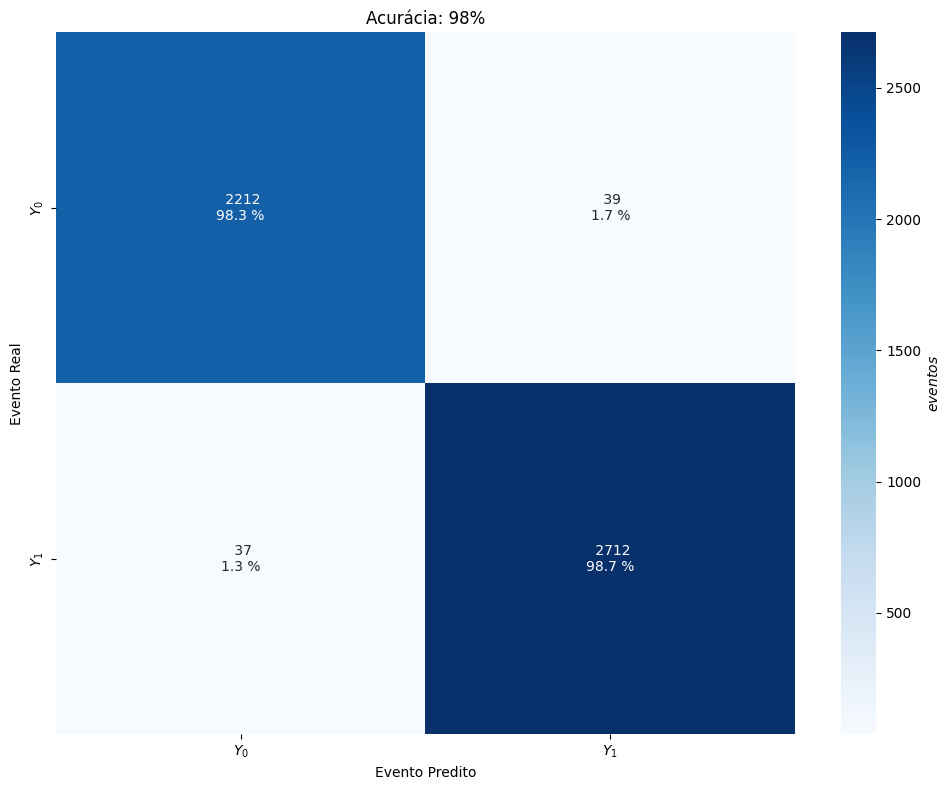

In [129]:
confusion_mtx = get_confusion_matrix(y_true, y_pred, classes_to_code)
tabela = get_performance_indexes(confusion_mtx, classes_to_code, "Logit(TensorFlow)")

### Avaliação da Regressão Logística - Numpy

Test set accuracy: 98.48%


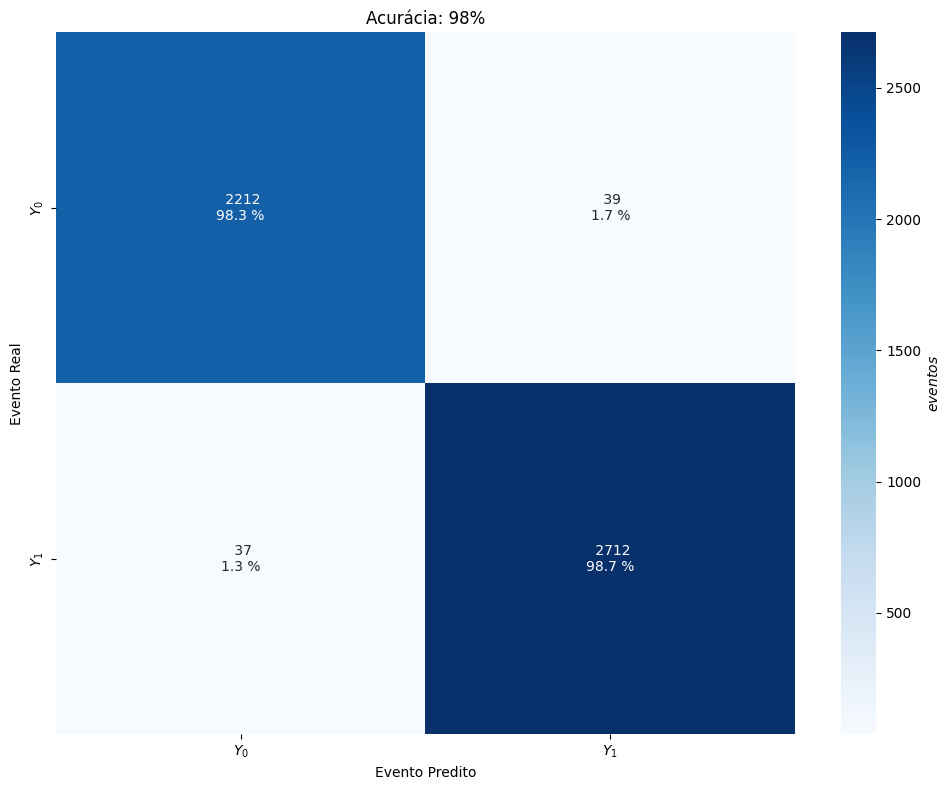

In [130]:
confusion_mtx = get_confusion_matrix(y_true, y_pred_numpy, classes_to_code)
tabela += get_performance_indexes(confusion_mtx, classes_to_code, "Logit(Numpy)")

### Desempenho da Classificação

In [131]:
header = ["Algoritmo", "Classe", "$T_P$", "$F_P$", "$F_N$", "$P(\%)$", "$R(\%)$", "$F_1$ Score"]
print(tabulate(tabela,
               headers=header,
               tablefmt='pipe'))

| Algoritmo         | Classe   |   $T_P$ |   $F_P$ |   $F_N$ |   $P(\%)$ |   $R(\%)$ |   $F_1$ Score |
|:------------------|:---------|--------:|--------:|--------:|----------:|----------:|--------------:|
| Logit(TensorFlow) | $Y_0$    |    2212 |      37 |      39 |      98.4 |      98.3 |             1 |
| Logit(TensorFlow) | $Y_1$    |    2712 |      39 |      37 |      98.6 |      98.7 |             1 |
| Logit(Numpy)      | $Y_0$    |    2212 |      37 |      39 |      98.4 |      98.3 |             1 |
| Logit(Numpy)      | $Y_1$    |    2712 |      39 |      37 |      98.6 |      98.7 |             1 |
